## Univariate data analysis

Now that you've successfully navigated our "crash course" in Python programming, it is time to put those skills to use working with real data, the focus of this course.  Python is an extraordinarily powerful tool for working with data, facilitated in large part by the external libraries of code produced by the Python community for data analysis and visualization.  We're going to be working with a few of those libraries this semester, starting with this notebook.  

In our data analysis assignments, you'll be working with real-live data - as in many real-world projects!  Further, the data that we find on the web often needs a little bit - or a lot - of modification before we can do anything analytically useful with it.  You will start to get some experience with that today, and things will get progressively more challenging throughout the semester.  

To get started, visit the following website from the Kaiser Family Foundation to download the data for this notebook: http://kff.org/other/state-indicator/adult-overweightobesity-rate/#.  Note that there is a sortable table that provides the percentage of adults who are overweight or obese by state and territory, and for the overall United States.  Look for the button that says "Download Raw Data" and click it.  (Note: this is not working in Internet Explorer, so use a different browser).  

![download-data](http://walkerke.github.io/geog30323/notebooks/img/download-raw.PNG)

The data file, a comma-separated values file called `raw_data.csv`, will download to your computer; move it to your notebook's directory.  __Important__: if the data file is in the same directory or a sub-directory of the folder you are saving your .ipynb notebook file in, you can use __relative paths__ to reference the data file.  For example, you can assign the path of the data file to a variable like this: 

In [3]:
raw_data = 'raw_data.csv'

When reading in the data shortly, your notebook will look for a file in its directory named `raw_data.csv`.  Alternatively, you could provide an absolute path to your data, e.g. `'C:\Users\kylewalker\Dropbox\Teaching\Geographic data analysis\geog30323\notebooks\data\raw_data.csv'`  I advise against doing this for a couple reasons.  First: if you keep your notebook and data together in the same folder, it will be able to access the data on any other machine.  The absolute path I've provided only works on my computer - further, Python needs forward slashes in path names (`/`), not the backslashes used by Windows.  

Now, you will read in the data that you've downloaded as a `pandas` DataFrame.  In class, we discussed the Python package `pandas`, which allows uses to work with data in a tabular structure, with individual observations organized as __rows__ and data attributes organized as __columns__.  Use the cell below to read in your data.  We'll be calling our data frame here `df`, short for data frame.  

In [4]:
import pandas as pd

df = pd.read_csv(raw_data, skiprows = 5, names = ['state', 'rate'])

df.head()

,state,rate
0,Alabama,0.6817
1,Alaska,0.6606
2,Arizona,0.6182
3,Arkansas,0.6989
4,California,0.6013


So what did you just do here?  You __imported__ in the code associated with the `pandas` library, which will be referenced by the prefix `pd`.  You then used the `read_csv` function from the `pandas` library to convert the CSV of overweight rates by state into a `pandas` DataFrame.  You used two additional named arguments to do this: `skiprows` and `names`.  Why was this important?  Let's take a quick look at the raw CSV file in Excel - your computer should open it natively in Excel if you locate it and double-click: 

![csv-head](http://walkerke.github.io/geog30323/notebooks/img/csv-head.PNG)

Note that the first four rows of your CSV file don't contain any data - just a description of the data - and the fifth row contains the value for the entire United States, which doesn't make a lot of sense when comparing states.  Raw data frequently are not ready to go for data analysis when downloaded, so be sure to be mindful of how data are formatted!  For example, if we had not supplied the `skiprows` argument, the data frame would look like this: 


In [5]:
df_wrong = pd.read_csv(raw_data)

df_wrong.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 46: invalid start byte

We get an error message.  

Now, let's check to see how our data are formatted.  We know from our preliminary inspection of the data that we have two columns; `state`, which contains the name of the state, and `rate`, which contains the overweight/obesity rate for that state.  `state` is an example of a __nominal__ attribute, which refers to a descriptive property of the row; `rate` is a __ratio__ attribute, which is a quantitative attribute in which zero refers to an absence of that quantity.  

Recall from class as well the importance of knowing your column types.  To check column types in `pandas`, use the `dtypes` attribute of the data frame.  

In [6]:
df.dtypes

state     object
rate     float64
dtype: object

Our `state` column is stored as an object, which you can interpret as a string/text column; our `rate` column is `float64`, which means that it is numeric, and we can do mathematical operations with it.  

## Exploring data with descriptive statistics

Now that we've read in our data, we'll want to get a sense of some of its basic properties.  You should recall from class that some of the most common descriptive statistics include __measures of central tendency__, which measure the "central point" of a distribution using different metrics, and __measures of dispersion__, which measure the "spread" of a distribution.  The most common measure of central tendency used is the __mean__, which is also commonly termed the average of the distribution.  The mean of a distribution is calculated by summing up all of the values in the distribution, and then dividing by the total number of values.  

`.mean()` is a method built-in to `pandas` that allows you to calculate the mean for a column in a data frame - or alternatively, all columns in a data frame.  Recall from class that columns can be accessed as attributes of the data frame or by index.  In turn, the following calls are equivalent: 

In [7]:
df.rate.mean()

0.6415301886792453

In [8]:
df['rate'].mean()

0.6415301886792453

Additionally, calling `.mean()` directly on the data frame will give back the mean for all of the data frame's numeric columns.  As we only have one numeric column in our data frame, you'd get the same result.  

Now you try!  In the cells below, use the `.median()` method to determine the median value of the `rate` column, which is the value at the 50 percent point of the distribution.  

In [9]:
# Run your code here!



There are many other built-in methods for getting descriptive statistics from your columns; for example, `.min()` will get you the minimum, `.std()` will get you the standard deviation, among many others.  Commonly, however, you'll want to get all of these statistics at once.  `pandas` lets you do this with the `.describe()` method, which you can call on your data frame, or any selected columns, to return the most common descriptive statistics for those columns.  For example: 

In [10]:
df.describe()

,rate
count,53.000000
mean,0.641530
std,0.034842
min,0.537600
25%,0.618600
50%,0.648400
75%,0.665000
max,0.698900


We get a nice summary here.  In addition to the mean and median (the "50%" you see), `pandas` returns the count, standard deviation, min/max, and the values at the one-quarter and three-quarters points in the distribution, allowing us to determine the __interquartile range__.  

While these numbers give us a general idea of the distribution of our data, tables of numbers are often not the most effective way to represent distributions.  As such, we turn to __visualization__, which enables us to explore our data graphically.  

## Univariate visualization

As we discussed in class, the principal library for data visualization in Python is `matplotlib`.  `matplotlib` is an extraordinarily flexible package that allows Python users to create just about any type of visualization.  However, it is sometimes criticized for being too "low-level" - that is, requiring a lot of code to accomplish simple tasks - and for having unattractive defaults.  

While we will be working with `matplotlib` in this class, many of our interactions with the package will occur through built-in plotting functions in `pandas` as well as `seaborn`, a Python library for statistical visualization that is built on top of `matplotlib`, and is lauded for its attractive styling.  

We'll be using `seaborn` from this point forward in the notebook.  __Important!__ `seaborn` is available through Anaconda, but does not come pre-packaged with the core Anaconda installation.  As such, recall from class that we need to install `seaborn` from the command line.  Any Python package in Anaconda, or that you install to your computer, will live on your computer.  As such, if you already installed `seaborn` in class and you are using the same machine, you don't need to do it again.  However, if you did not install it, or if you are working on a different computer, be sure to do so.  To get this done: 

1. Save your notebook, if your notebook session is currently active.  End your notebook session (you can do this by closing the command prompt).  
2. Open a new command prompt, and type the command `conda install seaborn`, then press Enter.  This will fetch `seaborn` from Anaconda's package repository.  
3. You'll be asked if you want to proceed with the installation, likely installing new packages that `seaborn` depends on and updating some other packages that are already installed.  Hit Enter to say "yes" which is the default option.  The packages should install.  
4. Use `ipython notebook` to fire up your notebook again, and you will be good to go!

You'll now want to import `seaborn` into your namespace.  In this course, I'll be using the standard import `import seaborn as sb`; `seaborn`'s creator Michael Waskom uses `import seaborn as sns`, which refers to the West Wing origins of the package's name; you'll likely see this around the web, so just be aware.  Importing `seaborn` automatically converts all of your graphics to `seaborn`'s style.  

Additionally, you will be using the Jupyter "magic" command `%matplotlib inline` to display your graphics in the Jupyter Notebook.  Magic commands are prefaced by a `%` sign in a Python cell, and there are lots that you can use; if you really want to see all of them, type `%magic` into a Python cell and run the cell.  We'll use these commands as needed throughout the semester.  

In [11]:
# Run this cell to import seaborn and tell your Notebook to display figures inline.  

%matplotlib inline

import seaborn as sb

We are now ready to visualize our data!  To get started, we'll use a common type of visualization called a __histogram__.  Histograms organize similar data values into __bins__, and then plot a series of bars whose heights represent the number of observations in each bin.  Histograms are built in to `pandas` and in turn are available as data frame methods.  Let's draw a histogram of overweight/obesity rates.  

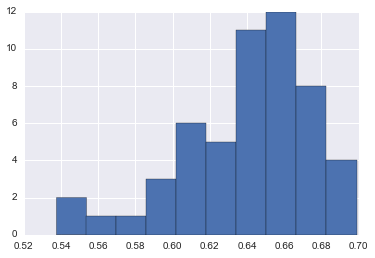

In [12]:
df.rate.hist()

Spend some time trying to understand the graph.  Many chart types that we'll explore in this class rely on the concept of the __Cartesian coordinate system__, which you may remember from grade school mathematics classes.  Positions on the chart are defined by their __x and y coordinates__.  The __x-axis__ is the horizontal axis; in the above histogram, this represents the value in our `rate` column.  The __y-axis__ is the vertical axis, which in our histogram represents the number of observations in each bin.  `pandas` defaults to 10 bins that are equal in width.  

When interpreting a histogram, note the "shape" of the plot.  Values tend to cluster around the right-hand side of the distribution, which is to be expected given that our mean and median are both around 64-65 percent; hwoever, there are a few values in the tail of the distribution on the left-hand side that are noticeably lower.  

Recall from class that a __normal distribution__ refers to a distribution that is symmetrical around its mean.  For example: 

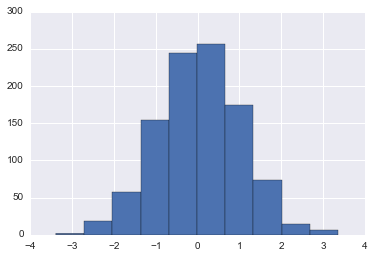

In [19]:
import numpy as np

np.random.seed(1983)

norm = pd.Series(np.random.randn(1000))

norm.hist()

In [20]:
norm.describe()

count    1000.000000
mean        0.037654
std         0.999050
min        -3.386319
25%        -0.628936
50%         0.039946
75%         0.708724
max         3.359611
dtype: float64

You don't need to understand everything I did in the above code yet; I used `numpy` to create a random sample of 1000 normally distributed observations with a mean of approximately 0 and a standard deviation of approximately 1.  Notice how the histogram is reasonably symmetrical, and the mean and median are near-identical.  In real data work - especially data work that involves observations of social phenomena- you'll almost never come across perfectly normal distributions.  A more detailed treatment of data distributions and probability should be left to your stats classes; however, I'll mention a couple things you can look at. 

In statistics, the "shape" of our distribution can be described by __skew__ and __kurtosis__.  Skew refers to the relative asymmetry of your distribution; __negative skew__ means that the long tail of observations stretches to the left (the "negative" direction along the x-axis), and __positive skew__ means that the long tail stretches to the right, the "positive" direction.  

Skew can be quantified; we won't get into the math behind it here, but it is available to you as a method in `pandas`: 

In [21]:
df.rate.skew()

-0.96650365307958108

We see that our distribution has negative skew, as we observed from the plot; a normally-distributed sample would have a skew near 0.  

In [23]:
norm.skew()

0.002915784155574272

We can also examine the kurtosis of our distribution, which measures its "flatness" or "peakedness".  A distribution with a high "peak", or many values clustered around the mean, is said to be _leptokurtic_; conversely, a distribution with a low peak and more even spread of values is _platykurtic_.  `pandas` employs Fisher's definition of kurtosis, in which a normal distribution has a kurtosis of 0, leptokurtic distributions have positive kurtosis values, and platykurtic distributions have negative values.  For example: 

In [28]:
df.rate.kurtosis()

0.9412995711538622

In [30]:
norm.kurtosis()

0.029743128783763961

We see that our data have a positive kurtosis, reflecting a higher "peak" than expected under normality.  

Your histogram can also be customized; for example, as with other functions/methods in the Jupyter Notebook, try pressing Shift+Tab on your keyboard after the first parenthesis following `hist` to see what parameters are available to you.  

In the cell below, re-draw the histogram with 25 bins instead of 10 by supplying the argument to `hist`, `bins = 25`.  Take note of how the plot changes!

In [32]:
# Your code goes here!

You should notice that there are now gaps in your chart; as the histogram needs bins of equal width, there are some areas where no observations fall into the specified bins.  As such, smoother representations of your data are sometimes preferable.  A popular type of visualization that is related to the histogram is the __kernel density plot__, which represents the shape of your frequency distribution with a smooth curve.  The mathematics behind the kernel density plot are beyond the scope of this course; however, the plot is still useful without knowing all of the math behind it.  

`seaborn` includes a function, `kdeplot`, that lets us visualize our data with this kind of smooth curve.  

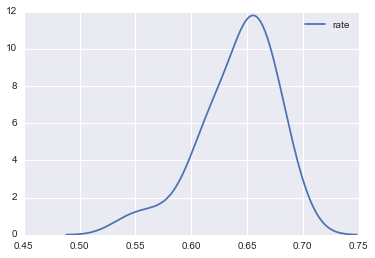

In [35]:
sb.kdeplot(df.rate)

Be careful with the y-axis in kernel density plots; it looks similar to the histogram in this instance, but it represents something quantitatively different than the count as in the histogram that can be complicated to explain; the important thing for the purposes of our course here is the shape of the curve.  As expected, we see a peak around 65-66 percent.  

There are many options available to you to customize your density plots; for example, you can change the color of your data series, and fill the area under the curve:  

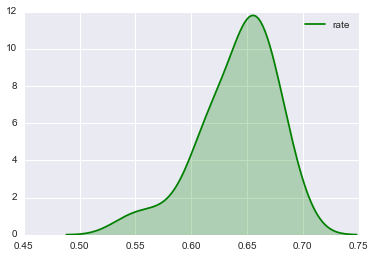

In [36]:
sb.kdeplot(df.rate, shade = True, color = 'green')

`seaborn` also has a built-in function called `distplot` that will allow you to show a density curve and a histogram concurrently: 

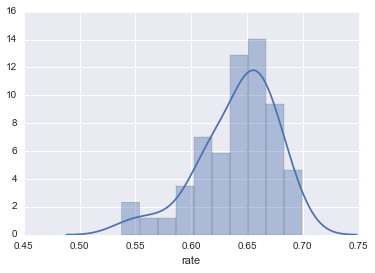

In [42]:
sb.distplot(df.rate, bins = 10)

An alternative way to visualize a frequency distribution is the __box plot__. As we discussed in class, box plots use three parallel lines to construct a box: one at the 25 percent point of the distribution, one at the median (50 percent point) of the distribution, and one at the 75 percent point of the distribution.  "Whiskers" then extend to either the minimum/maximum values of the distribution or 150 percent (conventionally) of the 25/75 percent points, and observations beyond the whiskers are "outliers" represented with dots.  `seaborn` allows us to draw box plots quite flexibly with its `boxplot` function: 

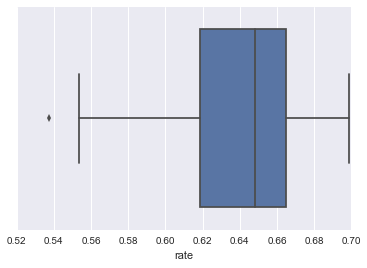

In [43]:
sb.boxplot(df.rate)

Notice how the dimensions of the box plot reflect the descriptive statistics we calculated earlier.  Also, note the outlier on the left-hand side of the plot; this dot represents the District of Columbia, which has the lowest adult overweight/obesity rate in our sample.  This makes sense, as DC is not really comparable to the 50 US states, given that it is a city in its entirety, and we know that dense cities tend to have lower adult overweight/obesity rates than suburbs and rural areas, which make up parts of all of our other observations.  

If you want, you can customize your box plot; for example, we can tell `seaborn` to orient it vertically: 

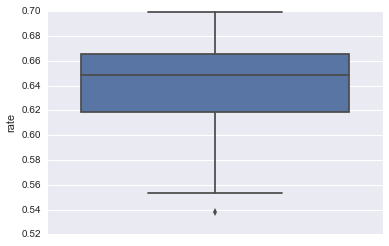

In [45]:
sb.boxplot(df.rate, orient = "v")

The final chart type I'll introduce to you in this notebook is the __violin plot__.  Violin plots are like combinations of box plots and density plots; they show the 25/50/75 percent values, as with box plots, but with density curves on either side of a central axis.  Let's take a look, again using `seaborn`: 

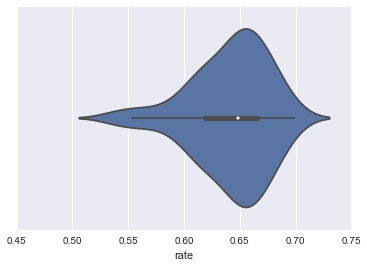

In [51]:
sb.violinplot(df.rate)

`seaborn` draws a miniature boxplot inside of symmetrical density curves representing the shape of the dataset.  If you want, you can customize the visualization further; for example, I'll tell `seaborn` to draw lines representing quartiles inside of the plot instead of the mini box plot, and change the color to purple: 

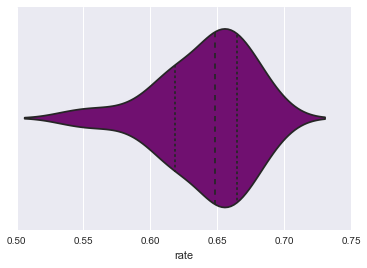

In [52]:
sb.violinplot(df.rate, inner = 'quartile', color = 'purple')

## Exercises

Now it's time to test what you've learned!  In the following exercises, you'll apply the techniques you've learned in this notebook to a new dataset from the Kaiser Family Foundation.  Download the dataset on child overweight/obesity rates at http://kff.org/other/state-indicator/overweightobese-children/# the same way you downloaded the dataset earlier in this assignment.  Follow the same steps to read it in - fortunately it is formatted the same way as the previous dataset.  However, be mindful of the name of the CSV file - and be sure to put your dataset in a place where your notebook can find it!  Load in the new dataset as a `pandas` DataFrame, and respond to the following questions: 

__Exercise 1:__ What are the mean and median values for childhood overweight/obesity rates for states in the US?  

__Exercise 2__: What are the minimum and maximum values for childhood overweight/obesity rates?  What is the range?  

__Exercise 3__: Draw a histogram of childhood overweight/obesity rates.  Do your data appear to be skewed in one direction or another?  

__Exercise 4__: Draw a box plot of childhood overweight/obesity rates.  

__Exercise 5:__: You pick: draw either a kernel density plot or a violin plot with your data.  Change the color of the plot to orange, and shade the area beneath the density curve if you select a density plot.  